In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = "{:,.2f}".format
pd.set_option("display.min_rows", 30)

In [3]:
googleplay = pd.read_csv("googleplaystore.csv")
googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
reviews = pd.read_csv("googleplaystore_user_reviews.csv")
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30


In [6]:
googleplay.columns = googleplay.columns.str.strip().str.lower().str.replace(' ', '_')
reviews.columns = reviews.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
googleplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          9367 non-null   float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10840 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app                     64295 non-null  object 
 1   translated_review       37427 non-null  object 
 2   sentiment               37432 non-null  object 
 3   sentiment_polarity      37432 non-null  float64
 4   sentiment_subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
reviews.isna().sum()

app                           0
translated_review         26868
sentiment                 26863
sentiment_polarity        26863
sentiment_subjectivity    26863
dtype: int64

In [10]:
reviewsclean = reviews.dropna()
len(reviewsclean)

37427

In [11]:
googleplay.isnull().sum().sort_values(ascending = False)

rating            1474
current_ver          8
android_ver          3
type                 1
content_rating       1
app                  0
category             0
reviews              0
size                 0
installs             0
price                0
genres               0
last_updated         0
dtype: int64

In [12]:
googleplay[googleplay["rating"] > 5]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
googleplayclean = googleplay.dropna()
googleplayclean.isnull().sum().sum()

0

In [14]:
googleplayclean[googleplayclean.duplicated()].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.20,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.20,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.40,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.40,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.00,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [15]:
googleplayclean.drop_duplicates(inplace=True)
googleplayclean[googleplayclean.duplicated()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


In [16]:
googleplayclean.reviews = googleplayclean.reviews.astype(int)

googleplayclean["installs"] = googleplayclean["installs"].str.replace('+', '').str.replace(',', '').astype(int)

googleplayclean["price"] = googleplayclean["price"].str.replace('$', '').astype(float)

googleplayclean[googleplayclean["price"] != 0].head()


,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.00,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.20,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.60,57,6.2M,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


In [17]:
googleplayclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             8886 non-null   object 
 1   category        8886 non-null   object 
 2   rating          8886 non-null   float64
 3   reviews         8886 non-null   int32  
 4   size            8886 non-null   object 
 5   installs        8886 non-null   int32  
 6   type            8886 non-null   object 
 7   price           8886 non-null   float64
 8   content_rating  8886 non-null   object 
 9   genres          8886 non-null   object 
 10  last_updated    8886 non-null   object 
 11  current_ver     8886 non-null   object 
 12  android_ver     8886 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 902.5+ KB


In [18]:
googleplayclean["last_updated"] = pd.to_datetime(googleplayclean["last_updated"])
googleplayclean.last_updated.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: last_updated, dtype: datetime64[ns]

In [19]:
googleplayclean.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [20]:
googleplayclean[googleplayclean["type"] == "Paid"].describe()

,rating,reviews,installs,price
count,611.00,611.00,611.00,611.00
mean,4.26,"14,898.31","113,193.91",14.01
std,0.56,"138,310.80","721,036.26",60.31
min,1.00,1.00,1.00,0.99
25%,4.10,31.00,"1,000.00",1.99
50%,4.40,214.00,"5,000.00",2.99
75%,4.60,"2,409.50","50,000.00",4.99
max,5.00,"2,376,564.00","10,000,000.00",400.00


In [169]:
max_installs = googleplayclean[['app', 'category', 'installs']].groupby(['app', 'category']).max('installs').sort_values(by='installs', ascending=False).reset_index()
max_installs.head(15)

,app,category,installs
0,Google+,SOCIAL,1000000000
1,Gmail,COMMUNICATION,1000000000
2,Google Play Books,BOOKS_AND_REFERENCE,1000000000
3,Google News,NEWS_AND_MAGAZINES,1000000000
4,Google Play Games,ENTERTAINMENT,1000000000
5,WhatsApp Messenger,COMMUNICATION,1000000000
6,Google Play Games,FAMILY,1000000000
7,Google Play Movies & TV,VIDEO_PLAYERS,1000000000
8,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1000000000
9,Google Drive,PRODUCTIVITY,1000000000


In [151]:
max_rated = googleplayclean[['app', 'category', 'rating']].groupby(['app', 'category']).max('rating').sort_values(by='rating', ascending=False).reset_index()
max_rated

,app,category,rating
0,Movement BE,SOCIAL,5.00
1,Free coupons and vouchers,FINANCE,5.00
2,CJ'S TIRE AND AUTO INC.,PRODUCTIVITY,5.00
3,CJ's Coffee Cafe,TRAVEL_AND_LOCAL,5.00
4,CK Employee Portal,BUSINESS,5.00
5,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.00
6,CL Notifier,TOOLS,5.00
7,CL REPL,TOOLS,5.00
8,CL Strength,HEALTH_AND_FITNESS,5.00
9,CN Resident,FAMILY,5.00


In [154]:
max_reviews = googleplayclean[['app', 'category', 'reviews']].groupby(['app', 'category']).max('reviews').sort_values(by='reviews', ascending=False).reset_index()
max_reviews.head(15)

,app,category,reviews
0,Facebook,SOCIAL,78158306
1,WhatsApp Messenger,COMMUNICATION,69119316
2,Instagram,SOCIAL,66577446
3,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578
4,Clash of Clans,GAME,44893888
5,Clash of Clans,FAMILY,44881447
6,Clean Master- Space Cleaner & Antivirus,TOOLS,42916526
7,Subway Surfers,GAME,27725352
8,YouTube,VIDEO_PLAYERS,25655305
9,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,24900999


In [157]:
price_counts = pd.DataFrame(googleplayclean[['category', 'type']].groupby(['category', 'type']).value_counts()).reset_index()
price_counts.columns = ['category', 'type', 'count']
price_counts.head(15)

,category,type,count
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
5,BOOKS_AND_REFERENCE,Free,169
6,BOOKS_AND_REFERENCE,Paid,8
7,BUSINESS,Free,261
8,BUSINESS,Paid,9
9,COMICS,Free,58


In [159]:
age_summary = pd.DataFrame(googleplayclean[['content_rating', 'category']].groupby(['content_rating']).value_counts('category')).sort_values(by='content_rating').reset_index()
age_summary.columns = ['content_rating', 'category', 'count']
age_summary.head(15)

,content_rating,category,count
0,Adults only 18+,COMICS,2
1,Adults only 18+,SPORTS,1
2,Everyone,MAPS_AND_NAVIGATION,121
3,Everyone,EDUCATION,120
4,Everyone,FOOD_AND_DRINK,97
5,Everyone,SOCIAL,82
6,Everyone,WEATHER,71
7,Everyone,AUTO_AND_VEHICLES,71
8,Everyone,HOUSE_AND_HOME,66
9,Everyone,LIBRARIES_AND_DEMO,64


In [160]:
merged_sets = pd.merge(reviewsclean[['app', 'sentiment', 'sentiment_polarity', 'sentiment_subjectivity']], googleplayclean[['app', 'category']], how='inner', on='app')
merged_sets.head()

,app,sentiment,sentiment_polarity,sentiment_subjectivity,category
0,10 Best Foods for You,Positive,1.00,0.53,HEALTH_AND_FITNESS
1,10 Best Foods for You,Positive,0.25,0.29,HEALTH_AND_FITNESS
2,10 Best Foods for You,Positive,0.40,0.88,HEALTH_AND_FITNESS
3,10 Best Foods for You,Positive,1.00,0.30,HEALTH_AND_FITNESS
4,10 Best Foods for You,Positive,1.00,0.30,HEALTH_AND_FITNESS


In [166]:
reviews_impact = pd.DataFrame(merged_sets[['app', 'category', 'sentiment']].groupby(['app', 'category']).value_counts('sentiment')).reset_index()
reviews_impact.columns = ['app', 'category', 'sentiment', 'count']
reviews_impact.head(15)

,app,category,sentiment,count
0,10 Best Foods for You,HEALTH_AND_FITNESS,Positive,162
1,10 Best Foods for You,HEALTH_AND_FITNESS,Neutral,22
2,10 Best Foods for You,HEALTH_AND_FITNESS,Negative,10
3,11st,SHOPPING,Positive,23
4,11st,SHOPPING,Neutral,9
5,11st,SHOPPING,Negative,7
6,1800 Contacts - Lens Store,MEDICAL,Positive,64
7,1800 Contacts - Lens Store,MEDICAL,Neutral,10
8,1800 Contacts - Lens Store,MEDICAL,Negative,6
9,1LINE – One Line with One Touch,GAME,Positive,27


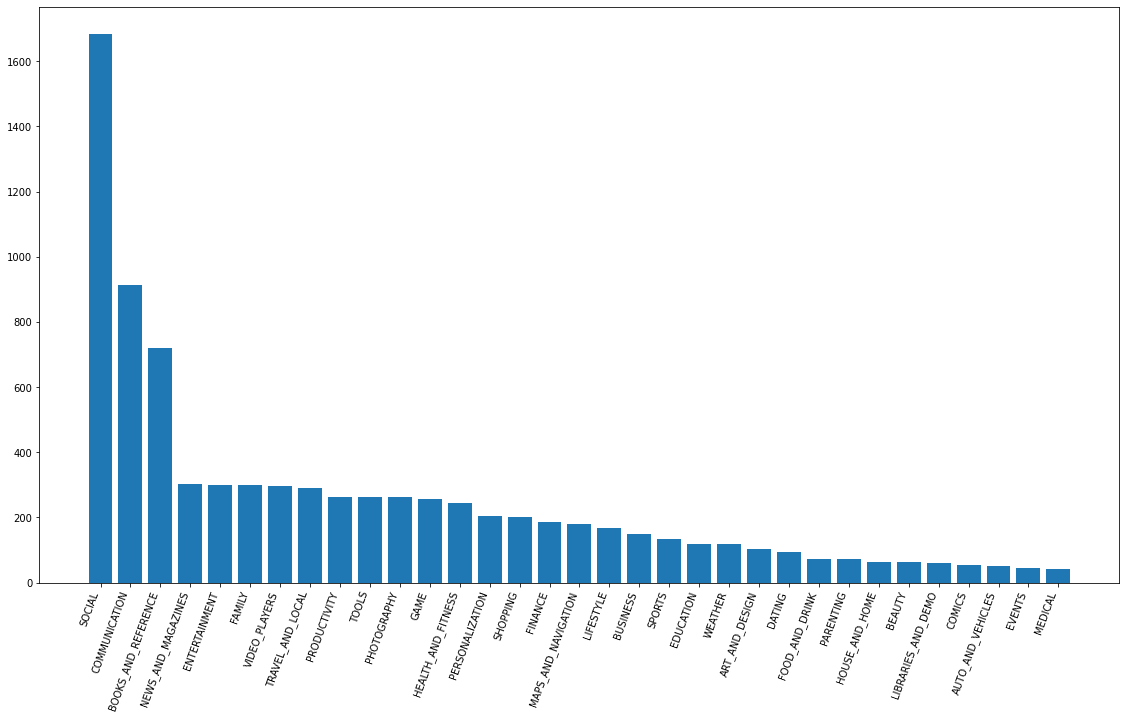

In [228]:
# Visualization
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
plt.xticks(rotation=70, ha='right')
categs = max_installs['category'].unique()
insts = max_installs['category'].value_counts()
ax.bar(categs, insts)
plt.show()